In [7]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

C:\Users\kirub\AppData\Roaming\Python\Python310\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/zipball/master" to C:\Users\kirub/.cache\torch\hub\master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to C:\Users\kirub/.cache\torch\hub\checkpoints\unet-e012d006.pt


In [8]:
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [9]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')


In [13]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition

# Initialize the model (change in_channels to 3 if the model was trained with RGB images)
model = UNet(in_channels=3, out_channels=1)  # Adjust the channels based on your model's setup

# Load the weights (state_dict)
model.load_state_dict(torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt'))

# Set the model to evaluation mode
model.eval()

# To check if the model is loaded correctly
print(model)



UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

C:\Users\kirub\AppData\Local\Temp\ipykernel_18328\2426339155.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\kirub\OneDrive\D

C:\Users\kirub\AppData\Local\Temp\ipykernel_8504\1362817967.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\co

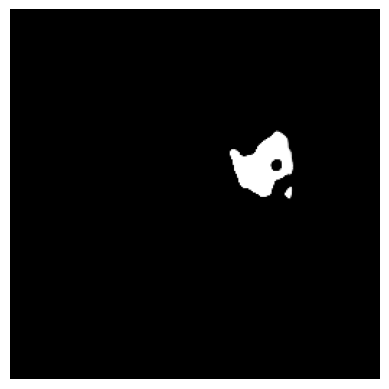

In [191]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_A616_19991226\TCGA_HT_A616_19991226_19.tif"# Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.350, 0.110, 0.200], std=[0.110, 0.100, 0.200]) # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0)  # Remove batch dimension

# If the output has more than one channel, convert to numpy (2D array for grayscale)
output_image = output_image.cpu().numpy()  # Convert to numpy for visualization

# Ensure that the output is 2D for imshow (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Visualize the output
plt.imshow(output_image, cmap='gray')  # Use 'gray' colormap for segmentation output
plt.axis('off')
plt.show()


C:\Users\kirub\AppData\Local\Temp\ipykernel_8504\2374542400.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\co

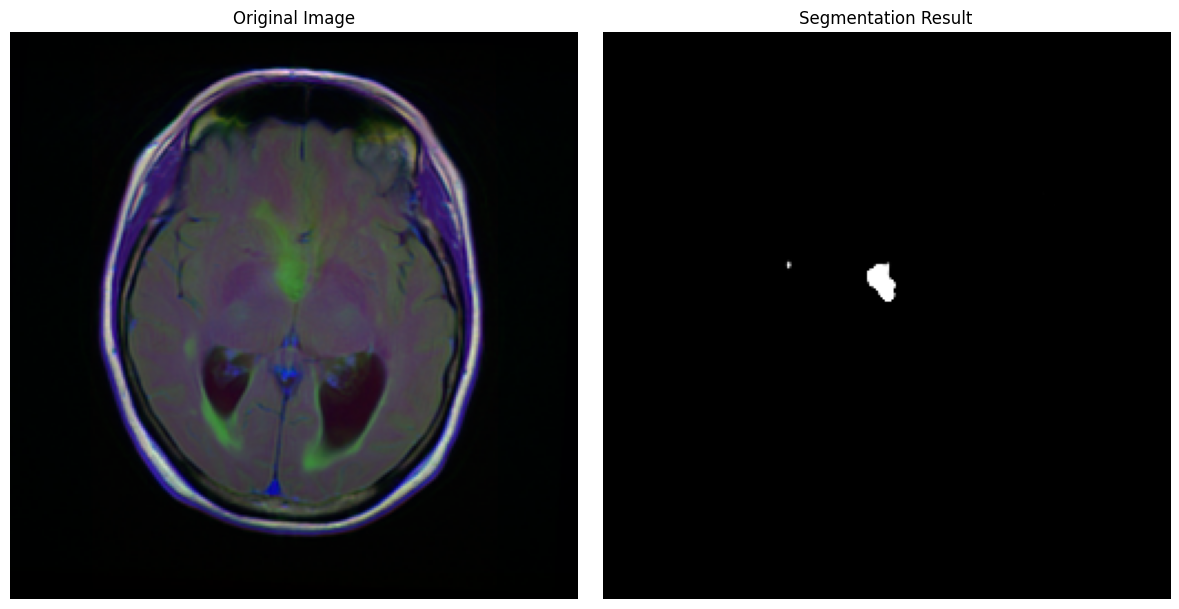

Combined image saved at: C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result\combined_result_20241219_150846.png


In [199]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_7693_19950520\TCGA_HT_7693_19950520_10.tif"# Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.350, 0.110, 0.200], std=[0.110, 0.100, 0.200]) # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0)  # Remove batch dimension
output_image = output_image.cpu().numpy()  # Convert to numpy for visualization

# Ensure that the output is 2D for imshow (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Create the result folder if it doesn't exist
result_folder = r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result'
os.makedirs(result_folder, exist_ok=True)

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
combined_image_filename = f"combined_result_{timestamp}.png"
combined_image_path = os.path.join(result_folder, combined_image_filename)

# Visualize the combined image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Segmentation Result
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')  # Use 'gray' colormap for segmentation output
plt.title("Segmentation Result")
plt.axis('off')

# Save and show the combined image
plt.tight_layout()
plt.savefig(combined_image_path)  # Save the combined image with a unique filename
plt.show()  # Display the combined image

print(f"Combined image saved at: {combined_image_path}")


C:\Users\kirub\AppData\Local\Temp\ipykernel_8504\3633148902.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\co

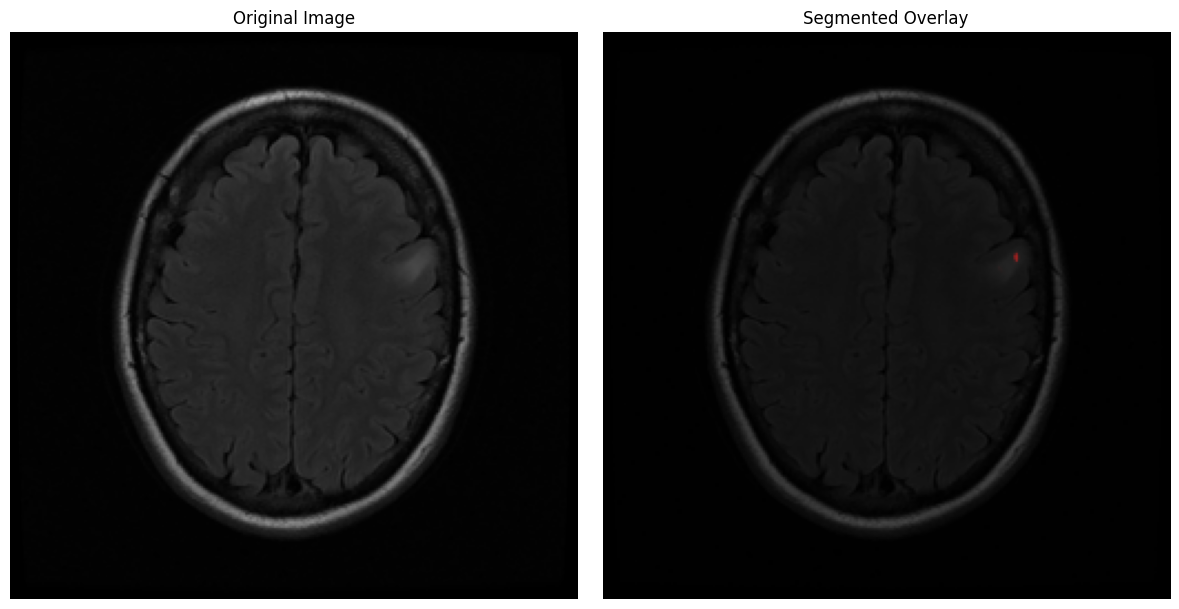

Side-by-side result saved at: C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result\side_by_side_result_20241219_154211.png


In [235]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_A616_19991226\TCGA_HT_A616_19991226_21.tif"# Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.320, 0.110, 0.200], std=[0.200, 0.100, 0.200])  # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy

# Ensure that the output is 2D for overlay (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Normalize the output to [0, 1] for visualization
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Convert original image to numpy for overlay
original_image_np = np.array(image.resize((256, 256)))

# Create an overlay where white areas are highlighted in red with transparency
overlay = np.zeros_like(original_image_np, dtype=np.uint8)
overlay[..., 0] = (output_image * 255).astype(np.uint8)  # Red channel
overlay[..., 1] = 0  # Green channel
overlay[..., 2] = 0  # Blue channel

# Blend the overlay with the original image
alpha = 0.5  # Transparency level (0.0: fully transparent, 1.0: fully opaque)
blended_image = original_image_np * (1 - alpha) + overlay * alpha
blended_image = blended_image.astype(np.uint8)

# Create the result folder if it doesn't exist
result_folder = r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result'
os.makedirs(result_folder, exist_ok=True)

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
combined_image_filename = f"side_by_side_result_{timestamp}.png"
combined_image_path = os.path.join(result_folder, combined_image_filename)

# Plot original and blended images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title("Original Image")
plt.axis('off')

# Blended Image
plt.subplot(1, 2, 2)
plt.imshow(blended_image)
plt.title("Segmented Overlay")
plt.axis('off')

# Save the combined figure
plt.tight_layout()
plt.savefig(combined_image_path)
plt.show()

print(f"Side-by-side result saved at: {combined_image_path}")


C:\Users\kirub\AppData\Local\Temp\ipykernel_8504\2351346610.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\co

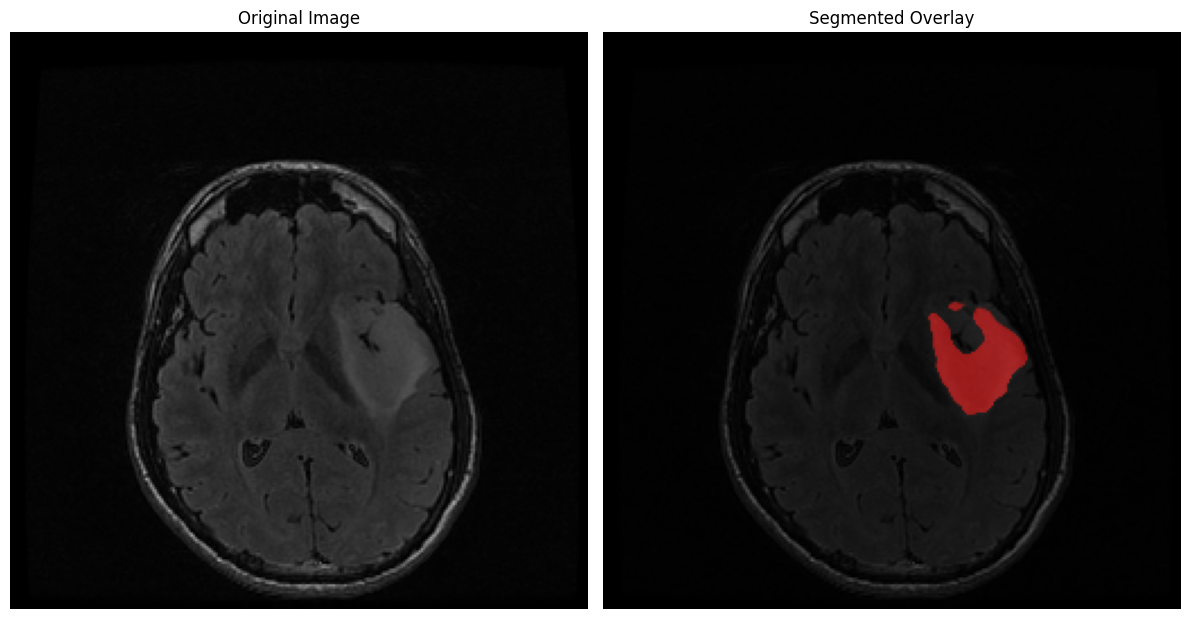

Side-by-side result saved at: C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result\side_by_side_result_20241219_172204.png


In [279]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_A61B_19991127\TCGA_HT_A61B_19991127_43.tif"
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.320, 0.120, 0.200], std=[0.200, 0.165, 0.200])   # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy

# Ensure that the output is 2D for overlay (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Normalize the output to [0, 1] for visualization
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Convert original image to numpy for overlay
original_image_np = np.array(image.resize((256, 256)))

# Create an overlay where white areas are highlighted in red with transparency
overlay = np.zeros_like(original_image_np, dtype=np.uint8)
overlay[..., 0] = (output_image * 255).astype(np.uint8)  # Red channel
overlay[..., 1] = 0  # Green channel
overlay[..., 2] = 0  # Blue channel

# Blend the overlay with the original image
alpha = 0.5  # Transparency level (0.0: fully transparent, 1.0: fully opaque)
blended_image = original_image_np * (1 - alpha) + overlay * alpha
blended_image = blended_image.astype(np.uint8)

# Create the result folder if it doesn't exist
result_folder = r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result'
os.makedirs(result_folder, exist_ok=True)

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
combined_image_filename = f"side_by_side_result_{timestamp}.png"
combined_image_path = os.path.join(result_folder, combined_image_filename)

# Plot original and blended images side by side
plt.figure(figsize=(12, 6.3))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title("Original Image")
plt.axis('off')

# Blended Image
plt.subplot(1, 2, 2)
plt.imshow(blended_image)
plt.title("Segmented Overlay")
plt.axis('off')

# Save the combined figure
plt.tight_layout()
plt.savefig(combined_image_path)
plt.show()

print(f"Side-by-side result saved at: {combined_image_path}")

In [282]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image, ImageSequence
from torchvision import transforms
import numpy as np
import os
from datetime import datetime

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\TCGA_CS_4944.png" # Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.320, 0.120, 0.200], std=[0.200, 0.165, 0.200])  # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy

# Ensure that the output is 2D for overlay (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Normalize the output to [0, 1] for visualization
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Convert original image to numpy for overlay
original_image_np = np.array(image.resize((256, 256)))

# Create an overlay where white areas are highlighted in red with transparency
overlay = np.zeros_like(original_image_np, dtype=np.uint8)
overlay[..., 0] = (output_image * 255).astype(np.uint8)  # Red channel
overlay[..., 1] = 0  # Green channel
overlay[..., 2] = 0  # Blue channel

# Blend the overlay with the original image
alpha = 0.3  # Transparency level (0.0: fully transparent, 1.0: fully opaque)
blended_image = original_image_np * (1 - alpha) + overlay * alpha
blended_image = blended_image.astype(np.uint8)

# Create the result folder if it doesn't exist
result_folder = r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result'
os.makedirs(result_folder, exist_ok=True)

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
gif_filename = f"blinking_result_{timestamp}.gif"
gif_path = os.path.join(result_folder, gif_filename)

# Convert numpy arrays to PIL images
original_image_pil = Image.fromarray(original_image_np)
blended_image_pil = Image.fromarray(blended_image)

# Create frames for the GIF (alternate between original and blended)
frames = [original_image_pil, blended_image_pil]

# Save as GIF
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=500,  # Duration for each frame in milliseconds
    loop=0  # Infinite loop
)

print(f"Blinking GIF saved at: {gif_path}")


C:\Users\kirub\AppData\Local\Temp\ipykernel_8504\3447738485.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\co

Blinking GIF saved at: C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result\blinking_result_20241219_173419.gif


In [8]:
import torch
from unet import UNet  # Adjust this import according to your U-Net model definition
from PIL import Image, ImageSequence
from torchvision import transforms
import numpy as np
import os
from datetime import datetime

# Initialize the model (define the architecture as used during training)
model = UNet(in_channels=3, out_channels=1)  # Adjust channels based on your model

# Load the state_dict (weights) into the model
checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\brain-segmentation-pytorch\weights\unet.pt')
model.load_state_dict(checkpoint)

# Set the model to evaluation mode
model.eval()

# Image loading and preprocessing
image_path = r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_A61B_19991127\TCGA_HT_A61B_19991127_32.tif"# Replace with your image path
image = Image.open(image_path).convert('RGB')  # Load image and convert to RGB if needed

# Transform the image to a tensor and normalize (adjust if your model was trained differently)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize if necessary to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.320, 0.120, 0.200], std=[0.200, 0.165, 0.200])  # Adjust based on your model's training
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_image)  # Pass image through model

# Output processing
output_image = output.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy

# Ensure that the output is 2D for overlay (e.g., single-channel grayscale)
if output_image.ndim == 3:
    output_image = output_image[0]  # Take the first channel (if the output is 3D)

# Normalize the output to [0, 1] for visualization
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Convert original image to numpy for overlay
original_image_np = np.array(image.resize((256, 256)))

# Create an overlay where white areas are highlighted in red with transparency
overlay = np.zeros_like(original_image_np, dtype=np.uint8)
overlay[..., 0] = (output_image * 255).astype(np.uint8)  # Red channel
overlay[..., 1] = 0  # Green channel
overlay[..., 2] = 0  # Blue channel

# Blend the overlay with the original image
alpha = 0.3  # Transparency level (0.0: fully transparent, 1.0: fully opaque)
blended_image = original_image_np * (1 - alpha) + overlay * alpha
blended_image = blended_image.astype(np.uint8)

# Combine the original and blended images side by side
combined_image = np.hstack((original_image_np, blended_image))

# Create the result folder if it doesn't exist
result_folder = r'C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result'
os.makedirs(result_folder, exist_ok=True)

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
gif_filename = f"blinking_result_{timestamp}.gif"
gif_path = os.path.join(result_folder, gif_filename)

# Convert numpy array to PIL image for the combined image
original_image_pil = Image.fromarray(original_image_np)
blended_image_pil = Image.fromarray(blended_image)

# Create frames for the GIF: alternate between original and blended image (right side)
frames = []

# Add alternating frames to create the blinking effect
for _ in range(5):  # Number of blink cycles
    # Create combined frames: original on left and blinking (alternating) on right
    frames.append(np.hstack((original_image_np, original_image_np)))  # Static original image on the right side
    frames.append(np.hstack((original_image_np, blended_image)))  # Original on the left, blended blinking on the right

# Convert frames into PIL images
pil_frames = [Image.fromarray(frame) for frame in frames]

# Save as GIF with blinking effect
pil_frames[0].save(
    gif_path,
    save_all=True,
    append_images=pil_frames[1:], 
    duration=500,  # Duration for each frame in milliseconds
    loop=0  # Infinite loop
)

print(f"Blinking GIF saved at: {gif_path}")


C:\Users\kirub\AppData\Local\Temp\ipykernel_15300\1060599003.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\kirub\OneDrive\Desktop\c

Blinking GIF saved at: C:\Users\kirub\OneDrive\Desktop\code_2\MRI3\result\blinking_result_20241221_135821.gif


In [3]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(r"C:\Users\kirub\OneDrive\Desktop\code_2\MRI4\archive\kaggle_3m\TCGA_HT_A616_19991226\TCGA_HT_A616_19991226_15.tif")
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

ModuleNotFoundError: No module named 'torchvision'

In [45]:
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)


In [46]:
import numpy as np
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]], device='cuda:0')
